## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Loading and Preprocessing

In [2]:
pd.set_option('display.max_columns',90)
data = pd.read_csv('student_exam_data.csv')
data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [3]:
data.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [4]:
data.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [5]:
data.dtypes

Study Hours            float64
Previous Exam Score    float64
Pass/Fail                int64
dtype: object

In [6]:
data.corr()['Pass/Fail']

Study Hours            0.583505
Previous Exam Score    0.443706
Pass/Fail              1.000000
Name: Pass/Fail, dtype: float64

In [7]:
data.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

## Checking Multicollinearity between independent variables with VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Study Hours', 'Previous Exam Score']]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.198401,Study Hours
1,4.198401,Previous Exam Score


## Outliear Checking

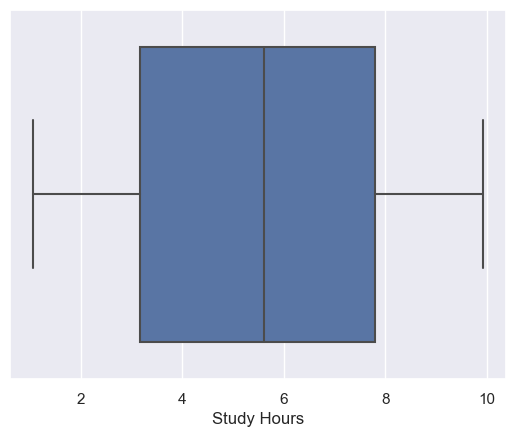

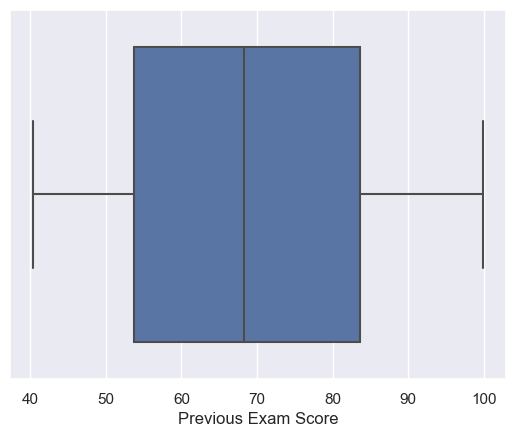

In [9]:
for i in data[['Study Hours', 'Previous Exam Score']]:
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [10]:
data = data.reset_index()

In [11]:
data.head()

,index,Study Hours,Previous Exam Score,Pass/Fail
0,0,4.370861,81.889703,0
1,1,9.556429,72.165782,1
2,2,7.587945,58.571657,0
3,3,6.387926,88.827701,1
4,4,2.404168,81.083870,0


In [12]:
data.drop('index', axis=1, inplace=True)

In [13]:
data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


## WOE Transformation for Logistic Regression

In [14]:
ranges=[-np.inf, data['Study Hours'].quantile(0.25), data['Study Hours'].quantile(0.5), data['Study Hours'].quantile(0.75), np.inf]
data['Study_Hours_category'] = pd.cut(data['Study Hours'], bins=ranges)
data

,Study Hours,Previous Exam Score,Pass/Fail,Study_Hours_category
0,4.370861,81.889703,0,"(3.172, 5.618]"
1,9.556429,72.165782,1,"(7.805, inf]"
2,7.587945,58.571657,0,"(5.618, 7.805]"
3,6.387926,88.827701,1,"(5.618, 7.805]"
4,2.404168,81.083870,0,"(-inf, 3.172]"
...,...,...,...,...
495,4.180170,45.494924,0,"(3.172, 5.618]"
496,6.252905,95.038815,1,"(5.618, 7.805]"
497,1.699612,48.209118,0,"(-inf, 3.172]"
498,9.769553,97.014241,1,"(7.805, inf]"


In [15]:
grouped = data.groupby(['Study_Hours_category', 'Pass/Fail'])['Pass/Fail'].count().unstack().reset_index()
grouped

Pass/Fail,Study_Hours_category,0,1
0,"(-inf, 3.172]",125,0
1,"(3.172, 5.618]",108,17
2,"(5.618, 7.805]",39,86
3,"(7.805, inf]",44,81


In [16]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['Study_Hours_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

Pass/Fail,Study_Hours_category,0,1,positive prop,negative prop,Study_Hours_woe
0,"(-inf, 3.172]",125,0,0.395570,0.000000,inf
1,"(3.172, 5.618]",108,17,0.341772,0.092391,1.308111
2,"(5.618, 7.805]",39,86,0.123418,0.467391,-1.331592
3,"(7.805, inf]",44,81,0.139241,0.440217,-1.151066


In [17]:
data = data.merge(grouped[['Study_Hours_category', 'Study_Hours_woe']], how = 'left', on = 'Study_Hours_category')
data

,Study Hours,Previous Exam Score,Pass/Fail,Study_Hours_category,Study_Hours_woe
0,4.370861,81.889703,0,"(3.172, 5.618]",1.308111
1,9.556429,72.165782,1,"(7.805, inf]",-1.151066
2,7.587945,58.571657,0,"(5.618, 7.805]",-1.331592
3,6.387926,88.827701,1,"(5.618, 7.805]",-1.331592
4,2.404168,81.083870,0,"(-inf, 3.172]",inf
...,...,...,...,...,...
495,4.180170,45.494924,0,"(3.172, 5.618]",1.308111
496,6.252905,95.038815,1,"(5.618, 7.805]",-1.331592
497,1.699612,48.209118,0,"(-inf, 3.172]",inf
498,9.769553,97.014241,1,"(7.805, inf]",-1.151066


In [18]:
ranges=[-np.inf, data['Previous Exam Score'].quantile(0.25), data['Previous Exam Score'].quantile(0.5), data['Previous Exam Score'].quantile(0.75), np.inf]
data['Previous_Exam_Score_category'] = pd.cut(data['Previous Exam Score'], bins=ranges)
data

,Study Hours,Previous Exam Score,Pass/Fail,Study_Hours_category,Study_Hours_woe,Previous_Exam_Score_category
0,4.370861,81.889703,0,"(3.172, 5.618]",1.308111,"(68.309, 83.58]"
1,9.556429,72.165782,1,"(7.805, inf]",-1.151066,"(68.309, 83.58]"
2,7.587945,58.571657,0,"(5.618, 7.805]",-1.331592,"(53.746, 68.309]"
3,6.387926,88.827701,1,"(5.618, 7.805]",-1.331592,"(83.58, inf]"
4,2.404168,81.083870,0,"(-inf, 3.172]",inf,"(68.309, 83.58]"
...,...,...,...,...,...,...
495,4.180170,45.494924,0,"(3.172, 5.618]",1.308111,"(-inf, 53.746]"
496,6.252905,95.038815,1,"(5.618, 7.805]",-1.331592,"(83.58, inf]"
497,1.699612,48.209118,0,"(-inf, 3.172]",inf,"(-inf, 53.746]"
498,9.769553,97.014241,1,"(7.805, inf]",-1.151066,"(83.58, inf]"


In [19]:
grouped = data.groupby(['Previous_Exam_Score_category', 'Pass/Fail'])['Pass/Fail'].count().unstack().reset_index()
grouped

Pass/Fail,Previous_Exam_Score_category,0,1
0,"(-inf, 53.746]",125,0
1,"(53.746, 68.309]",83,42
2,"(68.309, 83.58]",52,73
3,"(83.58, inf]",56,69


In [20]:
grouped['positive prop']=grouped[0]/grouped[0].sum()
grouped['negative prop']=grouped[1]/grouped[1].sum()
grouped['Previous_Exam_Score_woe']=np.log(grouped['positive prop']/grouped['negative prop'])
grouped

Pass/Fail,Previous_Exam_Score_category,0,1,positive prop,negative prop,Previous_Exam_Score_woe
0,"(-inf, 53.746]",125,0,0.395570,0.000000,inf
1,"(53.746, 68.309]",83,42,0.262658,0.228261,0.140365
2,"(68.309, 83.58]",52,73,0.164557,0.396739,-0.880022
3,"(83.58, inf]",56,69,0.177215,0.375000,-0.749561


In [21]:
data = data.merge(grouped[['Previous_Exam_Score_category', 'Previous_Exam_Score_woe']], how = 'left', on = 'Previous_Exam_Score_category')
data

,Study Hours,Previous Exam Score,Pass/Fail,Study_Hours_category,Study_Hours_woe,Previous_Exam_Score_category,Previous_Exam_Score_woe
0,4.370861,81.889703,0,"(3.172, 5.618]",1.308111,"(68.309, 83.58]",-0.880022
1,9.556429,72.165782,1,"(7.805, inf]",-1.151066,"(68.309, 83.58]",-0.880022
2,7.587945,58.571657,0,"(5.618, 7.805]",-1.331592,"(53.746, 68.309]",0.140365
3,6.387926,88.827701,1,"(5.618, 7.805]",-1.331592,"(83.58, inf]",-0.749561
4,2.404168,81.083870,0,"(-inf, 3.172]",inf,"(68.309, 83.58]",-0.880022
...,...,...,...,...,...,...,...
495,4.180170,45.494924,0,"(3.172, 5.618]",1.308111,"(-inf, 53.746]",inf
496,6.252905,95.038815,1,"(5.618, 7.805]",-1.331592,"(83.58, inf]",-0.749561
497,1.699612,48.209118,0,"(-inf, 3.172]",inf,"(-inf, 53.746]",inf
498,9.769553,97.014241,1,"(7.805, inf]",-1.151066,"(83.58, inf]",-0.749561


In [22]:
data_woe = data[['Study_Hours_woe', 'Previous_Exam_Score_woe', 'Pass/Fail']]
data_woe

,Study_Hours_woe,Previous_Exam_Score_woe,Pass/Fail
0,1.308111,-0.880022,0
1,-1.151066,-0.880022,1
2,-1.331592,0.140365,0
3,-1.331592,-0.749561,1
4,inf,-0.880022,0
...,...,...,...
495,1.308111,inf,0
496,-1.331592,-0.749561,1
497,inf,inf,0
498,-1.151066,-0.749561,1


In [23]:
data_woe[np.isinf(data_woe)] = 1.5 # Here I set every inf values to 1.5, since aftee woe transformation I got inf values in my dataset. 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6332\1828763657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[np.isinf(data_woe)] = 1.5
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6332\1828763657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_woe[np.isinf(data_woe)] = 1.5


In [24]:
data_woe

,Study_Hours_woe,Previous_Exam_Score_woe,Pass/Fail
0,1.308111,-0.880022,0
1,-1.151066,-0.880022,1
2,-1.331592,0.140365,0
3,-1.331592,-0.749561,1
4,1.500000,-0.880022,0
...,...,...,...
495,1.308111,1.500000,0
496,-1.331592,-0.749561,1
497,1.500000,1.500000,0
498,-1.151066,-0.749561,1


## Data splitting and Modelling

In [25]:
X = data_woe[['Study_Hours_woe', 'Previous_Exam_Score_woe']]
y = data_woe['Pass/Fail']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Evaluate Function to see Accuracy Results after ML applying


In [29]:
def evaluate(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    
    roc_score_test = roc_auc_score(y_test, y_prob_test)
    gini_score_test = roc_score_test*2-1
    
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    roc_score_train = roc_auc_score(y_train, y_prob_train)
    gini_score_train = roc_score_train*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    accuracy_score_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_score_train = metrics.accuracy_score(y_train, y_pred_train)
    
    print('Model Performance:')

    print('Gini Score for Test:', gini_score_test*100)
    
    print('Gini Score for Train:', gini_score_train*100)
    
    print('Accuracy Score for Test:', accuracy_score_test*100)
    
    print('Accuracy Score for Train:', accuracy_score_train*100)
    
    print('Confusion Matrix:', confusion_matrix)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
result = evaluate(lr, X_test, y_test)

Model Performance:
Gini Score for Test: 84.375
Gini Score for Train: 95.91377091377092
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


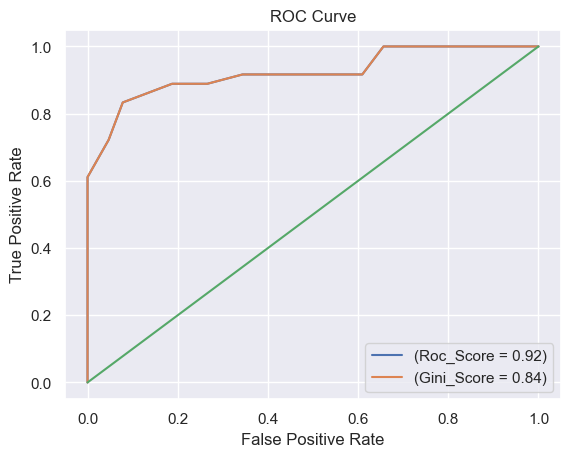

In [34]:
y_prob = lr.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
result = evaluate(dtc, X_test, y_test)

Model Performance:
Gini Score for Test: 84.80902777777777
Gini Score for Train: 96.53045903045903
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


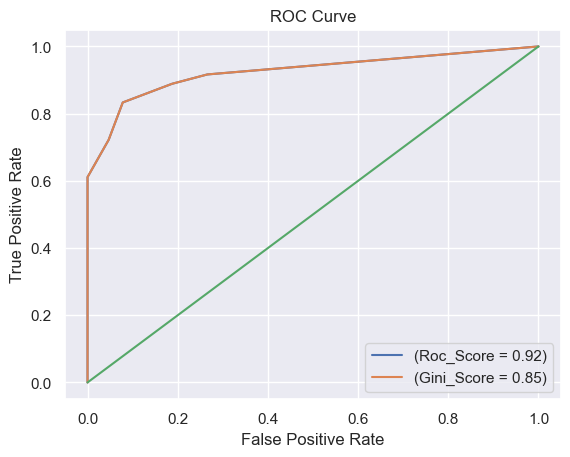

In [39]:
y_prob = dtc.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
result = evaluate(rfc, X_test, y_test)

Model Performance:
Gini Score for Test: 84.80902777777777
Gini Score for Train: 96.53045903045903
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


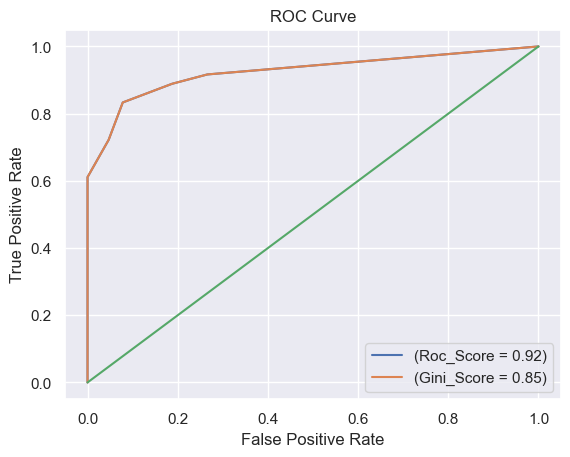

In [44]:
y_prob = rfc.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [45]:
from lightgbm import LGBMClassifier

In [46]:
lgbm = LGBMClassifier()

In [47]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 148, number of negative: 252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370000 -> initscore=-0.532217
[LightGBM] [Info] Start training from score -0.532217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [48]:
result = evaluate(lgbm, X_test, y_test)

Model Performance:
Gini Score for Test: 84.80902777777779
Gini Score for Train: 96.53045903045903
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


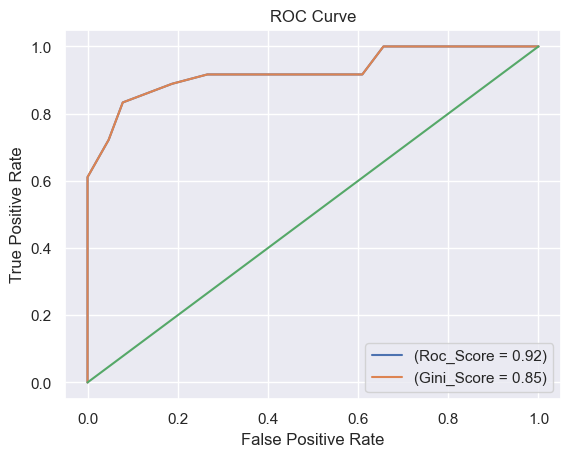

In [49]:
y_prob = lgbm.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [50]:
from xgboost import XGBClassifier

In [51]:
xgboost = XGBClassifier()

In [52]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
result = evaluate(xgboost, X_test, y_test)

Model Performance:
Gini Score for Test: 84.80902777777777
Gini Score for Train: 96.53045903045903
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


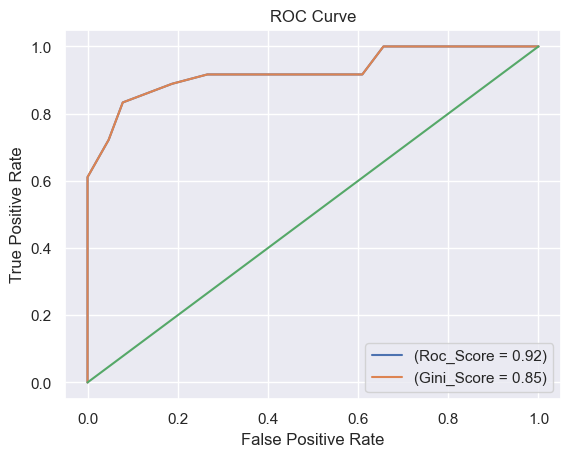

In [54]:
y_prob = xgboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [55]:
from catboost import CatBoostClassifier

In [56]:
catboost = CatBoostClassifier()

In [57]:
catboost.fit(X_train, y_train)

Learning rate set to 0.006966
0:	learn: 0.6820213	total: 142ms	remaining: 2m 21s
1:	learn: 0.6705806	total: 144ms	remaining: 1m 12s
2:	learn: 0.6593907	total: 148ms	remaining: 49.1s
3:	learn: 0.6489896	total: 151ms	remaining: 37.5s
4:	learn: 0.6408887	total: 153ms	remaining: 30.5s
5:	learn: 0.6307756	total: 156ms	remaining: 25.8s
6:	learn: 0.6197367	total: 159ms	remaining: 22.5s
7:	learn: 0.6101186	total: 161ms	remaining: 20s
8:	learn: 0.6017230	total: 164ms	remaining: 18.1s
9:	learn: 0.5946909	total: 167ms	remaining: 16.5s
10:	learn: 0.5860648	total: 169ms	remaining: 15.2s
11:	learn: 0.5767516	total: 172ms	remaining: 14.2s
12:	learn: 0.5672668	total: 175ms	remaining: 13.3s
13:	learn: 0.5606004	total: 177ms	remaining: 12.5s
14:	learn: 0.5540736	total: 180ms	remaining: 11.8s
15:	learn: 0.5448605	total: 182ms	remaining: 11.2s
16:	learn: 0.5377440	total: 185ms	remaining: 10.7s
17:	learn: 0.5291643	total: 187ms	remaining: 10.2s
18:	learn: 0.5232209	total: 189ms	remaining: 9.78s
19:	learn: 

In [58]:
result = evaluate(catboost, X_test, y_test)

Model Performance:
Gini Score for Test: 90.53819444444444
Gini Score for Train: 96.53045903045903
Accuracy Score for Test: 89.0
Accuracy Score for Train: 92.75
Confusion Matrix: [[59  5]
 [ 6 30]]


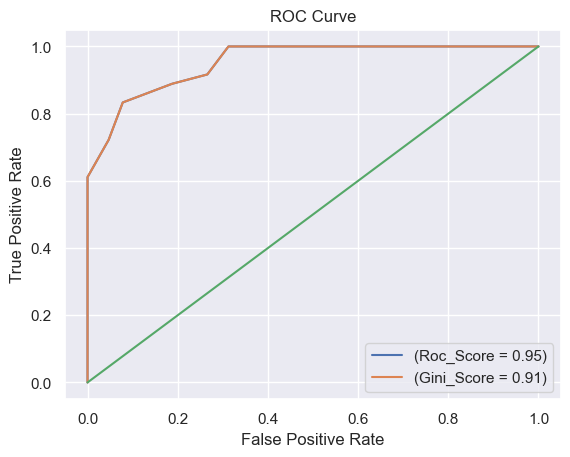

In [59]:
y_prob = catboost.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
gini_score = (roc_score*2)-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Score = %0.2f)' % roc_score)
plt.plot(fpr, tpr, label='(Gini_Score = %0.2f)' % gini_score)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

In [61]:
variables= []
train_Gini=[]
test_Gini=[]

for i in X_train.columns:
    X_train_single=X_train[[i]]
    X_test_single=X_test[[i]]
    
    catboost.fit(X_train_single, y_train)
    y_prob_train_single=catboost.predict_proba(X_train_single)[:, 1]
    
    
    roc_prob_train=roc_auc_score(y_train, y_prob_train_single)
    gini_prob_train=2*roc_prob_train-1
    
    
    catboost.fit(X_test_single, y_test)
    y_prob_test_single=catboost.predict_proba(X_test_single)[:, 1]
    
    
    roc_prob_test=roc_auc_score(y_test, y_prob_test_single)
    gini_prob_test=2*roc_prob_test-1
    
    
    variables.append(i)
    train_Gini.append(gini_prob_train)
    test_Gini.append(gini_prob_test)
    

df = pd.DataFrame({'Variable': variables, 'Train Gini': train_Gini, 'Test Gini': test_Gini})

df= df.sort_values(by='Test Gini', ascending=False)

df   

Learning rate set to 0.006966
0:	learn: 0.6867334	total: 1.63ms	remaining: 1.63s
1:	learn: 0.6821220	total: 3.01ms	remaining: 1.5s
2:	learn: 0.6759838	total: 4.93ms	remaining: 1.64s
3:	learn: 0.6699834	total: 6.42ms	remaining: 1.6s
4:	learn: 0.6656881	total: 7.69ms	remaining: 1.53s
5:	learn: 0.6599191	total: 9.05ms	remaining: 1.5s
6:	learn: 0.6542932	total: 10.6ms	remaining: 1.5s
7:	learn: 0.6487959	total: 11.5ms	remaining: 1.43s
8:	learn: 0.6448636	total: 12.8ms	remaining: 1.41s
9:	learn: 0.6409824	total: 13.9ms	remaining: 1.37s
10:	learn: 0.6371696	total: 14.9ms	remaining: 1.34s
11:	learn: 0.6334460	total: 15.9ms	remaining: 1.3s
12:	learn: 0.6284087	total: 16.8ms	remaining: 1.27s
13:	learn: 0.6234669	total: 18.1ms	remaining: 1.27s
14:	learn: 0.6199907	total: 19.3ms	remaining: 1.27s
15:	learn: 0.6165479	total: 20.6ms	remaining: 1.26s
16:	learn: 0.6131886	total: 21.7ms	remaining: 1.25s
17:	learn: 0.6098717	total: 22.7ms	remaining: 1.24s
18:	learn: 0.6066113	total: 23.8ms	remaining: 1.2

,Variable,Train Gini,Test Gini
0,Study_Hours_woe,0.710103,0.676215
1,Previous_Exam_Score_woe,0.537940,0.545573
